# üìà An√°lise de Desempenho e Estrat√©gias no Varejo


## Defini√ß√£o do Problema


A empresa enfrenta desafios significativos que comprometem sua sustentabilidade e crescimento futuro, evidenciados por produtos com preju√≠zo, queda nas vendas de eletr√¥nicos e eletroport√°teis, e uma redu√ß√£o acentuada nas vendas em 2014. Essas quest√µes podem indicar falhas na gest√£o de margens de lucro, na estrat√©gia de pre√ßos e nas abordagens de marketing, al√©m de uma poss√≠vel desconex√£o com as tend√™ncias do mercado e condi√ß√µes econ√¥micas.


## Objetivo

O objetivo deste projeto √© realizar uma an√°lise detalhada dos dados da empresa para identificar as causas subjacentes dos problemas mencionados. Atrav√©s da reavalia√ß√£o da estrutura de custos, an√°lise da concorr√™ncia, e revis√£o das estrat√©gias de marketing, buscamos:

## Importa√ß√£o de bibliotecas

In [54]:
#visualiza√ß√£o de dados.
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

#Manipula√ß√£o e analise de dados.
import pandas as pd
import numpy as np


## Carregando Dataframe

In [55]:
#Carregando dataframe.
df= pd.read_excel("dados_comerciais.xlsx")

## Fun√ß√µes

In [56]:
def converter_tipo(df, cols, tipo):
    for col in cols:
        if col in df.columns:
            df[col] = df[col].astype(tipo)
        else:
            raise ValueError(f"A coluna '{col}' n√£o existe no DataFrame.")
    return df


## Analise Explorat√≥ria

In [57]:
#cinco primeiras linhas
df.head()

ID-Produto           Produto         Categoria     Segmento  Fabricante  \
0  SKU-0000001   LG K10 TV Power         Celulares  Corporativo          LG   
1  SKU-0000002  Geladeira Duplex  Eletrodom√©sticos    Dom√©stico    Brastemp   
2  SKU-0000003    Lavadora 11 Kg  Eletrodom√©sticos    Dom√©stico    Brastemp   
3  SKU-0000004    Lavadora 11 Kg  Eletrodom√©sticos    Dom√©stico    Brastemp   
4  SKU-0000005    Lavadora 11 Kg  Eletrodom√©sticos    Dom√©stico  Electrolux   

     Loja     Cidade     Estado          Vendedor  ID-Vendedor Data Venda  \
0  SP8821  S√£o Paulo  S√£o Paulo      Ana Teixeira         1009 2012-10-04   
1  SP8821  S√£o Paulo  S√£o Paulo      Josias Silva         1006 2012-01-01   
2  SP8821  S√£o Paulo  S√£o Paulo      Josias Silva         1006 2012-02-02   
3  SP8821  S√£o Paulo  S√£o Paulo  Mateus Gon√ßalves         1003 2012-03-03   
4  SP8821  S√£o Paulo  S√£o Paulo     Artur Moreira         1004 2012-04-04   

   ValorVenda  Custo  
0      679.00    345  
1      832.00    712  
2      790.00    390  
3      765.32    200  
4      459.89    234

In [58]:
#Colunas
df.columns

Index(['ID-Produto', 'Produto', 'Categoria', 'Segmento', 'Fabricante', 'Loja',
       'Cidade', 'Estado', 'Vendedor', 'ID-Vendedor', 'Data Venda',
       'ValorVenda', 'Custo'],
      dtype='object')

In [59]:
#N√∫mero de linhas e colunas
df.shape

(457, 13)

### Verificando quantidade de linhas e colunas, tamanho dos arquivos e os tipos de dados inteiros(int), decimais(float64), data(datetime64), etc...).

In [60]:
#Dtype, linhas, colunas.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID-Produto   457 non-null    object        
 1   Produto      457 non-null    object        
 2   Categoria    457 non-null    object        
 3   Segmento     457 non-null    object        
 4   Fabricante   457 non-null    object        
 5   Loja         457 non-null    object        
 6   Cidade       457 non-null    object        
 7   Estado       457 non-null    object        
 8   Vendedor     457 non-null    object        
 9   ID-Vendedor  457 non-null    int64         
 10  Data Venda   457 non-null    datetime64[ns]
 11  ValorVenda   457 non-null    float64       
 12  Custo        457 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 46.5+ KB


### Criando coluna de Margem de lucro em busca em busca de Insights.A margem de lucro serve para a empresa garantir se mantenha vi√°vel no longo prazo. Ela √© fundamental na hora de formar o pre√ßo de venda do produto e deve balancear os custos de produ√ß√£o.

In [61]:
#Nova coluna
df["margem_lucro(%)"] = (df["ValorVenda"] - df["Custo"]) / df["ValorVenda"] * 100

### Irei transformar o "custo" em valor decimal(float64). Isso simplificar√° a manipula√ß√£o dos dados, considerando que estamos trabalhando com valores monet√°rios.

In [62]:
df = converter_tipo(df, ['Custo'], float)

# Checando se reconheceu como float
print(df["Custo"].dtype)

float64


In [63]:
# Primeiro registro de vendas
inicio = df['Data Venda'].min().strftime('%d/%m/%Y')
print(f'Primeiro registro de vendas foi em {inicio}')

# √öltimo registro de vendas
termino = df['Data Venda'].dt.date.max().strftime('%d/%m/%Y')
print(f'A √∫ltima venda foi em {termino}')

Primeiro registro de vendas foi em 01/01/2012
A √∫ltima venda foi em 02/12/2015


### Como podemos ver abaixo temos um desvio padr√£o muito alto na coluna de lucro e valor venda. Tamb√©m temos um n√∫mero negativo em "Lucro", duas situa√ß√µes que merecem uma aten√ß√£o maior...

In [64]:
#Fun√ß√£o describe.
df[["ValorVenda","Custo", "margem_lucro(%)"]].describe().round(2)

ValorVenda   Custo  margem_lucro(%)
count      457.00  457.00           457.00
mean       786.23  132.75            60.44
std        754.38   83.52            55.75
min         12.00   90.00          -900.00
25%        167.00  120.00            28.14
50%        671.00  120.00            78.84
75%       1230.00  120.00            90.24
max       3999.00  800.00            97.00

In [65]:
#Indentificando n√∫meros de preju√≠zos.
df["margem_lucro(%)"][lambda x: x< 0]

433   -900.0
Name: margem_lucro(%), dtype: float64

## Mais informa√ß√µes sobre o produto que deu preju√≠zo 

In [66]:
#Podendo indentificar o produto, fabricante, a loja, o vendedor, etc...Com fun√ß√£o lambda.
df.apply(lambda row: row["Custo"] - row["ValorVenda"], axis=1)
prejuizos = df[df["margem_lucro(%)"] < 0]
print(prejuizos)

      ID-Produto     Produto        Categoria   Segmento Fabricante   Loja  \
433  SKU-0000434  Ventilador  Eletroport√°teis  Dom√©stico    Samsung  R1297   

         Cidade          Estado       Vendedor  ID-Vendedor Data Venda  \
433  Petr√≥polis  Rio de Janeiro  Artur Moreira         1004 2015-08-02   

     ValorVenda  Custo  margem_lucro(%)  
433        12.0  120.0           -900.0  


### A margem de lucro est√° totalmente desbalanceada, confirmando o que a descri√ß√£o das estat√≠sticas j√° tinha revelado.

In [67]:
#Agrupando produto por valorvenda e margem de lucro
df.groupby("Produto").agg({"margem_lucro(%)": "mean", "ValorVenda": "mean"}).reset_index().sort_values(by="margem_lucro(%)", ascending=False).round(2)


Produto  margem_lucro(%)  ValorVenda
16          Samsung Galaxy 8            96.79     3867.75
14        Notebook Dell 8 GB            90.63     1282.35
13          Morotola Moto G5            90.12     1218.62
0            Ar Condicionado            89.22     1217.17
3           Desktop HP 16 GB            89.02     1210.50
2              Desktop 32 GB            86.31      972.41
18           Sony Experia XA            82.83      699.00
6           Geladeira Duplex            82.69     1094.38
10            Lavadora 11 Kg            80.64      819.36
17            Secadora Vapor            77.14      664.68
8         Impressora Deskjet            76.20      581.66
12               Micro-Ondas            69.55      513.36
4          Forno-Micro-Ondas            67.87      600.07
9            LG K10 TV Power            49.19      679.00
7                      Grill            30.95      211.00
1                  Aspirador            21.16      170.06
15  Processador de Alimentos            19.46      149.00
11            Liquidificador            14.80      142.00
5                 Fritadeira             6.73      133.75
19                Ventilador           -29.13      133.36

- Com o gr√°fico de caixa, podemos ter uma an√°lise mais profunda e com facil interpreta√ß√£o, visualiza√ß√£o de dispers√£o, compara√ß√£o de grupos e poss√≠veis identifica√ß√£o de outliers.
- 1- Abaixo no gr√°fico de caixas podemos verificar que o custo de alguns produtos est√£o altos e desbalanceados. Uma indetifica√ß√£o mais preocupante ainda √© que tem um ou mais produto abaixo da linha de zero em "Lucro".

In [71]:
# Gr√°fico de caixa para Custo e ValorVenda
fig_box = go.Figure()

# Adicionando o gr√°fico de caixa para "Custo"
fig_box.add_trace(go.Box(y=df['Custo'], name='Custo'))

# Adicionando o gr√°fico de caixa para "ValorVenda"
fig_box.add_trace(go.Box(y=df['ValorVenda'], name='Valor de Venda'))

# T√≠tulo do gr√°fico de caixa
fig_box.update_layout(title='Boxplot Valor de Venda e Custo', yaxis_title='Valor')
fig_box.show()

- 2- Abaixo podemos analisar que √© apenas um produto cujo pre√ßo √© mais alto em compara√ß√£o aos outros produtos.

In [81]:
## Calcular novanta porcento
acima= df['ValorVenda'].quantile(0.95)

# Filtrar produtos com ValorVenda acima de 95%
produtos_acima = df[df['ValorVenda'] > acima][['Produto', 'ValorVenda']]

# Quantidade de anomalias
quantidade_anomalias = produtos_acima.shape[0]

# Exibir resultados
print("Produtos com ValorVenda acima de 90%:")
print(produtos_acima)
print("\nQuantidade de poss√≠veis anomalias:", quantidade_anomalias)

Produtos com ValorVenda acima de 90%:
              Produto  ValorVenda
11   Geladeira Duplex      1651.0
62   Desktop HP 16 GB      1788.0
90    Ar Condicionado      1399.0
139  Samsung Galaxy 8      1899.0
147  Samsung Galaxy 8      3999.0
150  Samsung Galaxy 8      3999.0
154  Samsung Galaxy 8      3999.0
156  Samsung Galaxy 8      3999.0
157  Samsung Galaxy 8      3999.0
158  Samsung Galaxy 8      3999.0
159  Samsung Galaxy 8      3999.0
166  Geladeira Duplex      1567.0
169  Samsung Galaxy 8      3999.0
170  Samsung Galaxy 8      3999.0
171  Samsung Galaxy 8      3999.0
172  Samsung Galaxy 8      3999.0
173  Samsung Galaxy 8      3999.0
174  Samsung Galaxy 8      3999.0
175  Samsung Galaxy 8      3999.0
176  Samsung Galaxy 8      3999.0
183  Geladeira Duplex      1579.0
188  Geladeira Duplex      1899.0
400   Ar Condicionado      1390.0

Quantidade de poss√≠veis anomalias: 23


- Agora vamos examinar como est√£o as percentagens de lucro e custo.

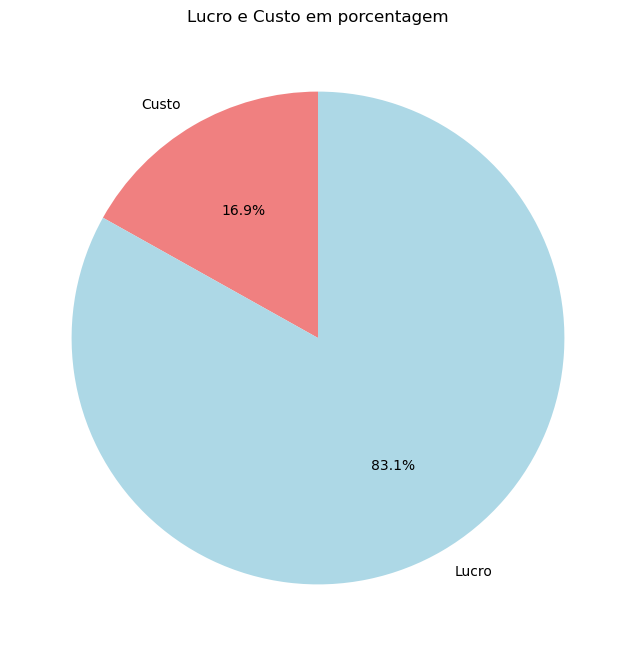

In [100]:
#Total de Valor venda, custo e  lucro.
totaldevendas=df[["Custo", "Lucro"]].sum()

#Tamanho da figura.
plt.figure(figsize=(12, 8))

#Grafico de pizza, labels, dados em porcentagem, angulo e cores.
plt.pie(totaldevendas, labels=totaldevendas.index, autopct='%1.1f%%', startangle=90, colors=["lightcoral", "lightblue", "lightgreen"])

#T√≠tulo.
plt.title("Lucro e Custo em porcentagem")

#Mostra o gr√°fico.
plt.show()

- Analisando os total de venda por "Data Venda".

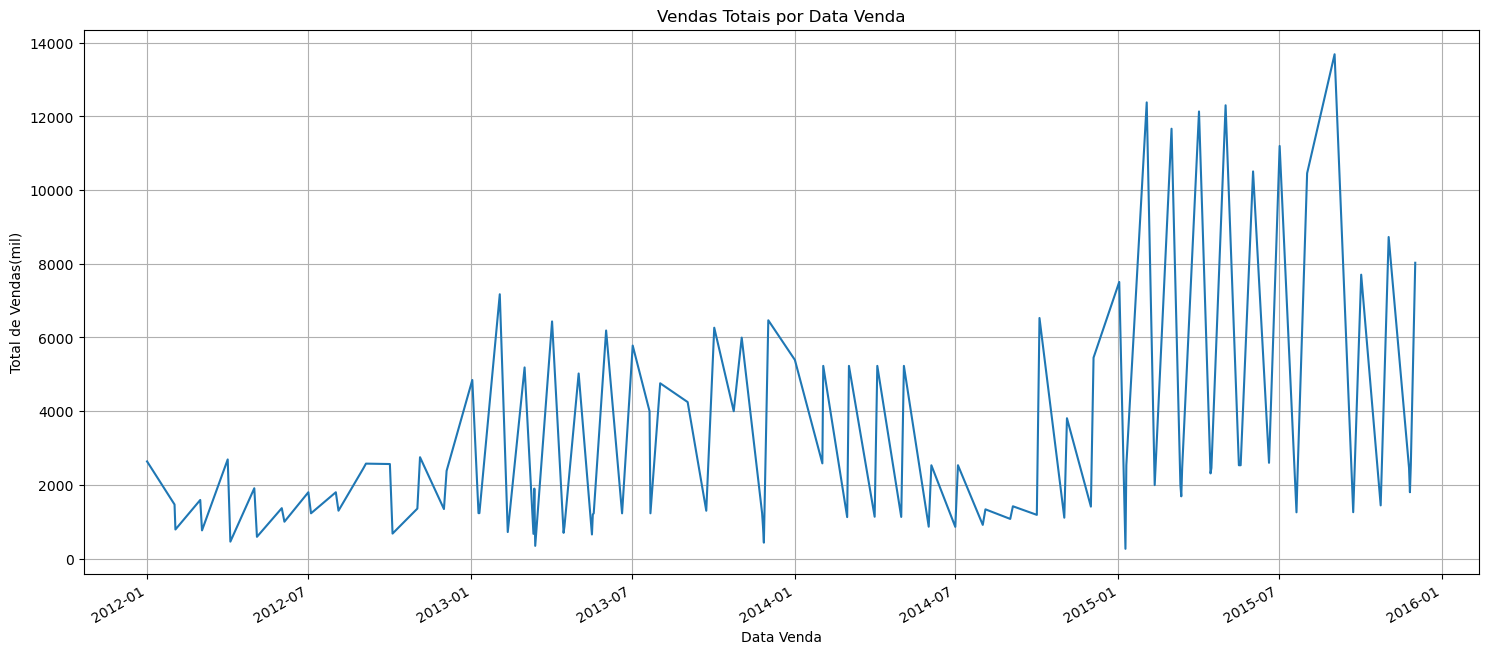

In [101]:
#DataFrame.
datavenda=df.groupby(["Data Venda"])["ValorVenda"].sum()

#Tamanho do gr√°fico.
plt.figure(figsize=(18, 8))

# Gr√°fico de linhas.
datavenda.plot()

#Labels.
plt.xlabel("Data Venda")
plt.ylabel("Total de Vendas(mil)")
plt.title("Vendas Totais por Data Venda")

#Grade.
plt.grid(True)

#Mostrar arquivo
plt.show()

- Verifique como n√£o ficou t√£o bom visualmente, destacando a impot√¢ncia para uma an√°lise por ano e m√™s. Irei criar uma coluna com os anos e os meses separados de "data de venda".

In [102]:
#Elaborando uma coluna para o ano e o meses. 
df["Ano"] = df["Data Venda"].dt.year
df["Mes"] = df["Data Venda"].dt.month
#Verificando as colunas.
df.head().round(2)

ID-Produto           Produto         Categoria     Segmento  Fabricante  \
0  SKU-0000001   LG K10 TV Power         Celulares  Corporativo          LG   
1  SKU-0000002  Geladeira Duplex  Eletrodom√©sticos    Dom√©stico    Brastemp   
2  SKU-0000003    Lavadora 11 Kg  Eletrodom√©sticos    Dom√©stico    Brastemp   
3  SKU-0000004    Lavadora 11 Kg  Eletrodom√©sticos    Dom√©stico    Brastemp   
4  SKU-0000005    Lavadora 11 Kg  Eletrodom√©sticos    Dom√©stico  Electrolux   

     Loja     Cidade     Estado          Vendedor  ID-Vendedor Data Venda  \
0  SP8821  S√£o Paulo  S√£o Paulo      Ana Teixeira         1009 2012-10-04   
1  SP8821  S√£o Paulo  S√£o Paulo      Josias Silva         1006 2012-01-01   
2  SP8821  S√£o Paulo  S√£o Paulo      Josias Silva         1006 2012-02-02   
3  SP8821  S√£o Paulo  S√£o Paulo  Mateus Gon√ßalves         1003 2012-03-03   
4  SP8821  S√£o Paulo  S√£o Paulo     Artur Moreira         1004 2012-04-04   

   ValorVenda  Custo   Lucro  MargemdeLucro   Ano  Mes  
0      679.00  345.0  334.00          49.19  2012   10  
1      832.00  712.0  120.00          14.42  2012    1  
2      790.00  390.0  400.00          50.63  2012    2  
3      765.32  200.0  565.32          73.87  2012    3  
4      459.89  234.0  225.89          49.12  2012    4

- Podemos notar abaixo que tivemos uma baixa do ano 2013 para 2014 e uma boa recupera√ß√£o em 2015.

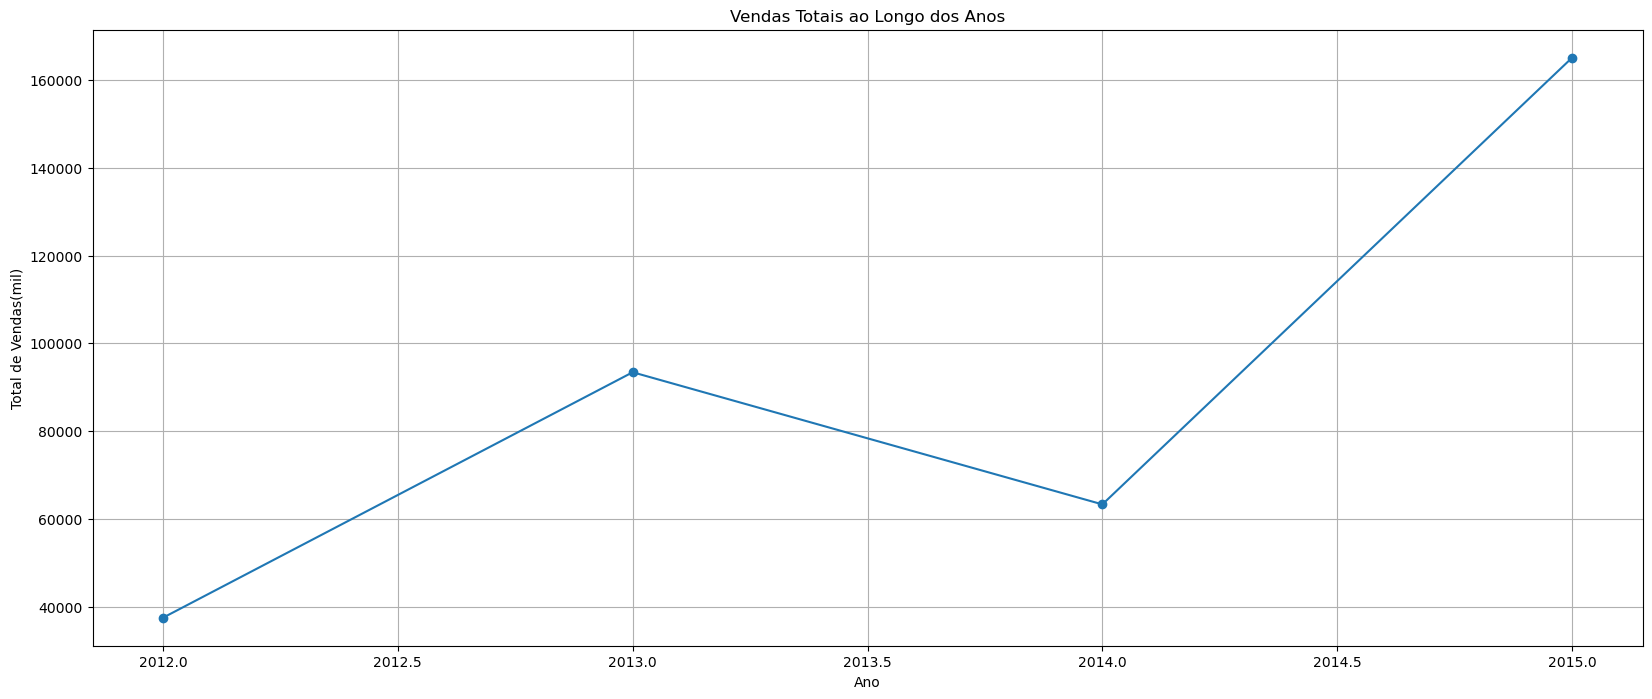

In [103]:
#DataFrame
ano=df.groupby(["Ano"])["ValorVenda"].sum()

#Tamanho do gr√°fico
plt.figure(figsize=(20, 8))

# Adicionei marcas para mostrar pontos no gr√°fico.
ano.plot(marker='o') 

#Labels
plt.xlabel("Ano")
plt.ylabel("Total de Vendas(mil)")
plt.title("Vendas Totais ao Longo dos Anos")
#Grade.
plt.grid(True)

#Mostrar arquivo
plt.show()

N√£o foram registradas vendas de eletr√¥nicos e ouve uma queda da categoria com maior desempenho(Eletrodom√©sticos). Principalmente por esses fatores houve uma baixa em 2014, como podemos an√°lisar no gr√°fico abaixo.

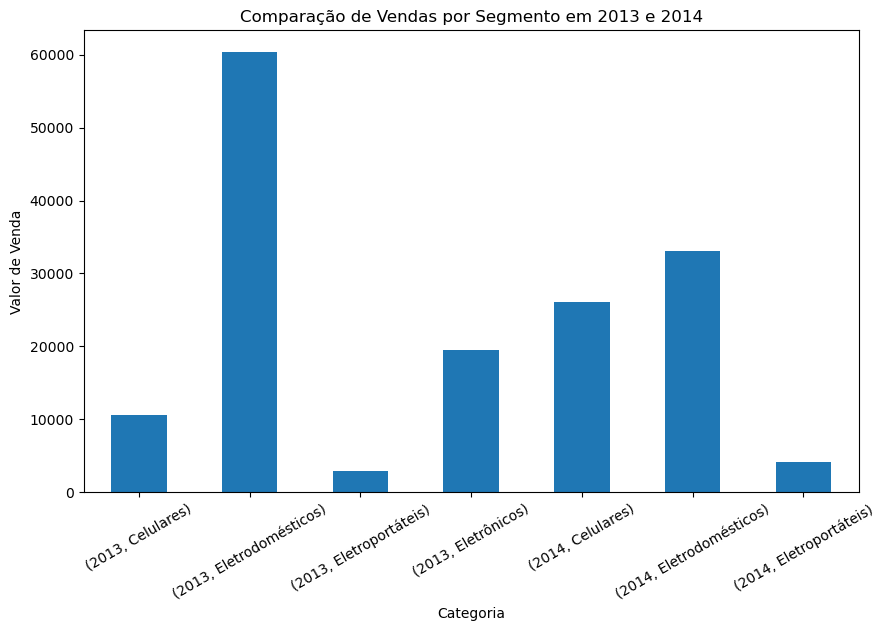

In [104]:
df_2013_2014 = df[df['Ano'].isin([2013, 2014])]
resultado = df_2013_2014.groupby(["Ano", "Categoria"])["ValorVenda"].sum()
resultado.plot(kind='bar', figsize=(10, 6))
plt.title("Compara√ß√£o de Vendas por Segmento em 2013 e 2014")
plt.xlabel("Categoria")
plt.ylabel("Valor de Venda")
plt.xticks(rotation=30)
plt.show()

- Podemos observar que as vendas entre mar√ßo e maio teve um bom desempenho, j√° agosto e dezembro as vendas preocupam. Uma queda preocupante.

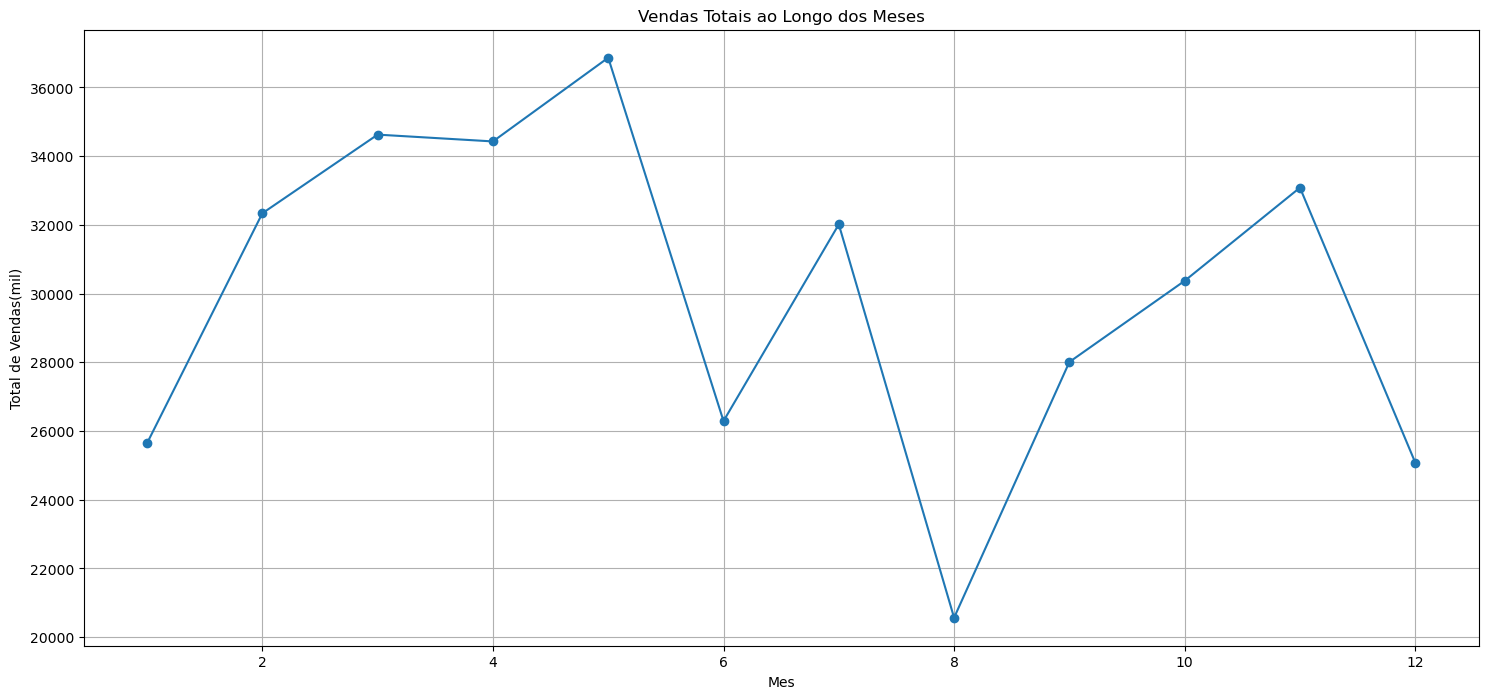

In [105]:
#DataFrame
mes=df.groupby(["Mes"])["ValorVenda"].sum()

#Tamanho do gr√°fico
plt.figure(figsize=(18, 8))

# Adicionei marcas para mostrar pontos no gr√°fico.
mes.plot(marker='o')  

#Labels
plt.xlabel("Mes")
plt.ylabel("Total de Vendas(mil)")
plt.title("Vendas Totais ao Longo dos Meses")
#Grade.
plt.grid(True)

#Mostrar arquivo
plt.show()

- Vendas de produtos por categoria

In [106]:
#Quantidade de vendas por Categoria
df["Categoria"].value_counts()

Categoria
Eletrodom√©sticos    226
Eletroport√°teis     124
Eletr√¥nicos          60
Celulares            47
Name: count, dtype: int64

- A m√©dia dos pre√ßos de celulares ao longo dos anos diminu√≠ram ano a ano. Eletr√¥nicos tamb√©m ca√≠ram as m√©dias dos valores, mas com uma queda de maior relev√¢ncia.

In [107]:
#Agrupamento por ano, categoria e valor m√©dia de venda por produto.
df.groupby(["Ano","Categoria"])["ValorVenda"].mean().reset_index().sort_values(by = "ValorVenda",  ascending = False).round(2)

Ano         Categoria  ValorVenda
3   2013         Celulares     2649.00
7   2014         Celulares     2614.50
10  2015         Celulares     1911.94
2   2012       Eletr√¥nicos     1246.47
4   2013  Eletrodom√©sticos      887.66
11  2015  Eletrodom√©sticos      876.29
1   2012  Eletrodom√©sticos      841.04
6   2013       Eletr√¥nicos      812.89
8   2014  Eletrodom√©sticos      769.86
0   2012         Celulares      679.00
13  2015       Eletr√¥nicos      577.60
9   2014   Eletroport√°teis      169.71
5   2013   Eletroport√°teis      155.37
12  2015   Eletroport√°teis      148.52

- Pre√ßo total de venda por categoria, em ordem decrescente para melhor compara√ß√£o.

In [108]:
#Agrupamento por ano, categoria e valor total de venda.
df.groupby(["Ano","Categoria"])["ValorVenda",].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False).round(2)

Ano         Categoria  ValorVenda
11  2015  Eletrodom√©sticos    77989.88
10  2015         Celulares    61182.00
4   2013  Eletrodom√©sticos    60361.13
8   2014  Eletrodom√©sticos    33104.02
7   2014         Celulares    26145.00
1   2012  Eletrodom√©sticos    21867.08
6   2013       Eletr√¥nicos    19509.43
2   2012       Eletr√¥nicos    14957.66
13  2015       Eletr√¥nicos    13862.46
12  2015   Eletroport√°teis    12030.45
3   2013         Celulares    10596.00
9   2014   Eletroport√°teis     4073.00
5   2013   Eletroport√°teis     2952.00
0   2012         Celulares      679.00

- Com a an√°lise, podemos notar que a categoria de celulares foi a que mais cresceu, atingindo um aumento de 8.910,60%.

In [109]:
#Calculando porcentagem de crescimento de vendas totai em celulares.
celulares=(61182-679) /679*100
print("Aumento percentual de: {:.2f}%".format(celulares))

Aumento percentual de: 8910.60%


* J√° os eletrodom√©sticos tiveram uma queda em 2014 de 45,15%, levando em considera√ß√£o o ano de 2013.

In [110]:
#Calculando a porcentagem de decl√≠nio nas vendas totais em eletrodomesticos
eletrodomesticos=(33.10402-60.36113) /60.36113*100
print("Diminui√ß√£o percetual de: {:.2f}%".format(eletrodomesticos))

Diminui√ß√£o percetual de: -45.16%


- Criando um gr√°fico, para melhor visualiza√ß√£o das vendas totais por categorias.

- A categoria de eletrodom√©sticos representa mais de 53% das vendas, mesmo com a queda nas vendas ao longo dos anos.

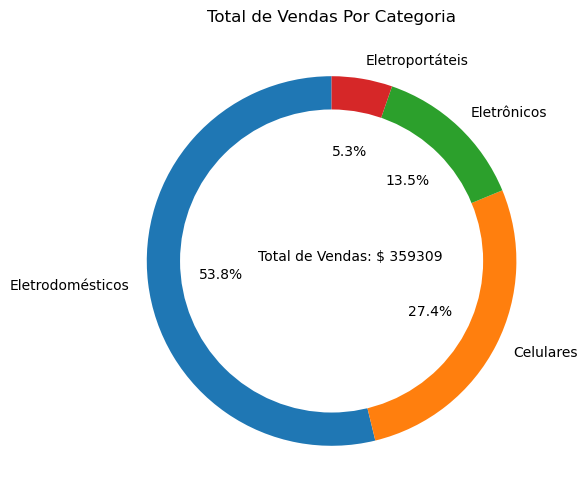

In [111]:
#Agrupando em um novo dataframe para criar um grafico e analisar as vendas totais ao longo do tempo registrado nas categorias.
rosca = df.groupby("Categoria")["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False) 
# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gr√°fico de pizza, labels, colocando a porcentagem nas categorias e o angulo.
plt.pie(rosca["ValorVenda"], 
        labels = rosca["Categoria"],
        autopct='%.1f%%', startangle = 90)

#Limpando o c√≠rculo central, com um espa√ßo em branco, para criar a apar√™ncia de uma rosca.
centre_circle = plt.Circle((0, 0), 0.82, fc = "white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# T√≠tulo e subt√≠tulo.
plt.annotate(text = "Total de Vendas: " + "$ " + str(int(sum(rosca["ValorVenda"]))), xy = (-0.40, 0))         #Esse codigo parece complicado, mas √© s√≥ o subt√≠tulo que vai aparecer no meio do gr√°fico com valor total de vendas e a posi√ß√£o.
plt.title("Total de Vendas Por Categoria")

#Mostrar gr√°fico.
plt.show()

- Podemos notar como as vendas de Eletroport√°teis est√£o baixas, vamos ver como est√£o as margem de lucro!

- Aqui vemos como a margem de lucro dos Eletroport√°teis est√£o abaixo dos demais produtos.

In [70]:
df.groupby("Categoria")["margem_lucro(%)",].mean().reset_index().sort_values(by = "margem_lucro(%)",  ascending = False).round(2)

Categoria  margem_lucro(%)
0         Celulares            91.37
3       Eletr√¥nicos            81.14
1  Eletrodom√©sticos            76.56
2   Eletroport√°teis             9.32

- Ainda investigando, podemos observar que nesta empresa n√£o trabalham tanto com LG e Sony na categoria de celulares ou n√£o s√£o atrativos o bastante. No entanto, nos eletrodom√©sticos, Brastemp e Consul se destacam de forma positiva nas vendas.


* J√° nos eletr√¥nicos temos o destaque da HP.

In [113]:
df.groupby(["Categoria" ,"Fabricante"])["ValorVenda"].agg({"sum"})

sum
Categoria        Fabricante          
Celulares        LG            679.00
                 Motorola    35340.00
                 Samsung     61884.00
                 Sony          699.00
Eletrodom√©sticos Brastemp    92786.30
                 Consul      58897.22
                 Electrolux   6690.02
                 LG           7567.57
                 Panasonic   12775.00
                 Samsung     14606.00
Eletroport√°teis  Brit√¢nia    10373.45
                 LG           2436.00
                 Samsung      6246.00
Eletr√¥nicos      Dell        12823.54
                 Epson        7872.46
                 HP          18285.44
                 Sony         9348.11

- Analisando a quantidade de produtos vendidos por fabricante.

In [148]:
#Quantidade de vendas por fabricante
df["Fabricante"].value_counts()

Fabricante
Brastemp      90
Consul        82
Samsung       74
Brit√¢nia      61
HP            29
Motorola      29
LG            27
Panasonic     26
Epson         12
Dell          10
Sony          10
Electrolux     7
Name: count, dtype: int64

- Grafico de barras, para visualizar a m√©dia de venda por produto para cada fabricante.

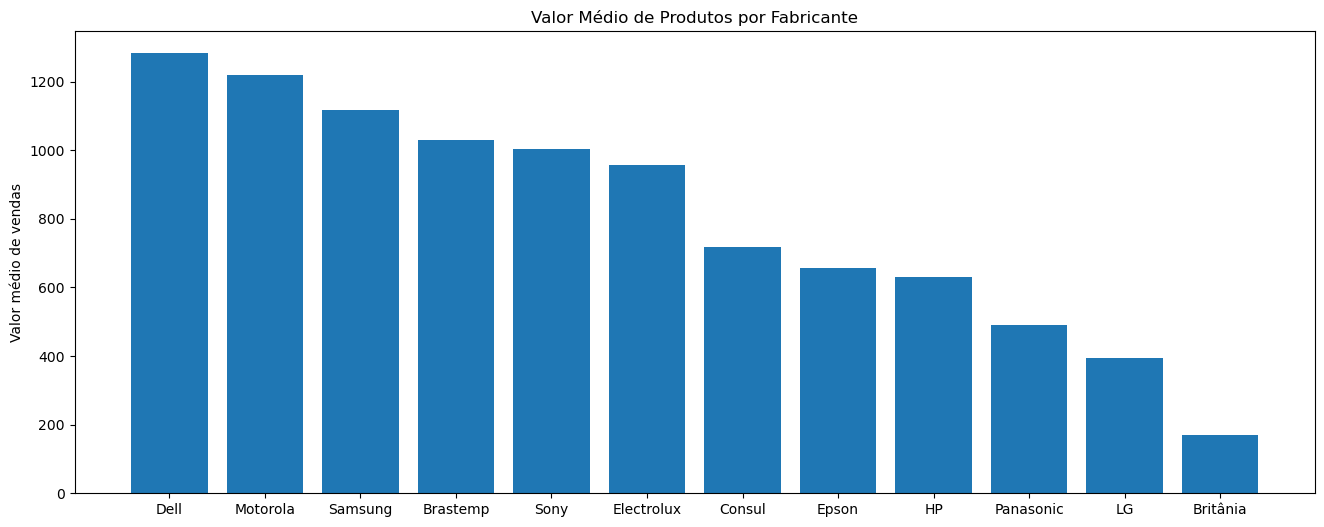

In [149]:
#Odenando um dataframe para criar um grafico de barras.
barras= df.groupby("Fabricante")["ValorVenda"].mean().reset_index().sort_values(by = "ValorVenda",  ascending = False)

#Tamanho da figura.
plt.figure(figsize = (16, 6))   

#Gr√°fico de barras
plt.bar(barras["Fabricante"], barras["ValorVenda"])

#Titulo y e t√≠tulo pr√≠ncipal
plt.ylabel("Valor m√©dio de vendas")
plt.title("Valor M√©dio de Produtos por Fabricante")

#Mostrar gr√°fico.
plt.show()

- Checando a quantidade de produtos vendidos por segmento.

- Informa√ß√µes sobre o valor m√©dio de produtos por categoria em anos, apresentadas em ordem decrescente para facilitar a an√°lise.

In [150]:
#Agrupando.
df.groupby(["Ano","Segmento"])["ValorVenda",].mean().reset_index().sort_values(by = "ValorVenda",  ascending = False).round(2)

Ano     Segmento  ValorVenda
6   2014  Corporativo     3999.00
8   2015  Corporativo     3999.00
3   2013  Corporativo     1488.60
5   2013   Industrial     1291.20
0   2012  Corporativo     1202.82
10  2015   Industrial     1128.00
1   2012    Dom√©stico      856.32
4   2013    Dom√©stico      680.35
7   2014    Dom√©stico      601.76
9   2015    Dom√©stico      598.28
2   2012   Industrial      459.00

- Visualizando o total de vendas por seguimentos,

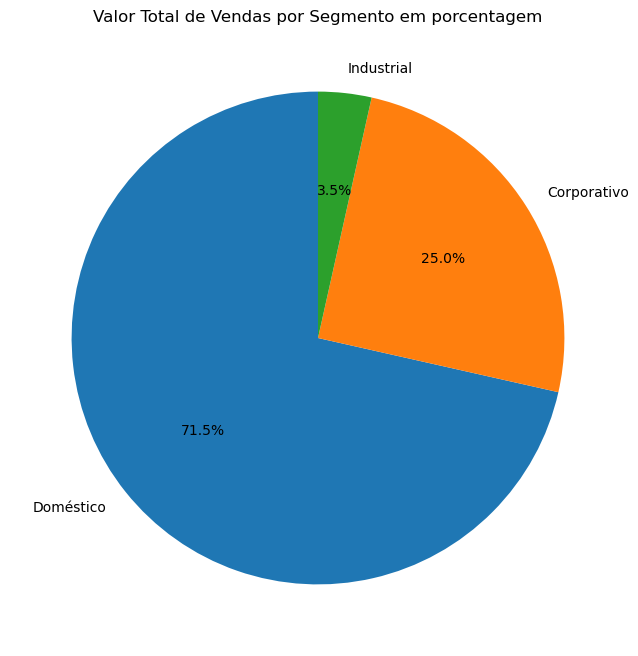

In [151]:
# criando dataframe
pizza = df.groupby("Segmento")["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False)

#Tamanho da figura.
plt.figure(figsize = (15, 8))

#Gr√°fico de pizza.
plt.pie(pizza["ValorVenda"], 
        labels = pizza["Segmento"],
        autopct='%.1f%%', startangle = 90)
#T√≠tulo de mostrar gr√°fico.
plt.title("Valor Total de Vendas por Segmento em porcentagem")
plt.show()       

- As sete lojas com melhores desempenhos em vendas da empresa.

In [152]:
#Ordenando com agrupamento.
df.groupby("Loja")["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False).head(7)

Loja  ValorVenda
11  SP8822    87888.88
5    R1296    50843.66
4    R1295    48905.90
10  SP8821    39292.99
12  SP8823    35903.69
0    A9990    28282.87
13   V7654    24803.77

- As sete lojas com piores desempenhos em vendas da empresa.

In [153]:
#Ordenando com agrupamento.
df.groupby("Loja")["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False).tail(7)

Loja  ValorVenda
8   S6543    12621.00
1   A9991    10016.00
2   B7659     7998.00
7   R1298     5031.00
9  SA7761     2940.00
6   R1297     2515.45
3   P0761     2265.90

- Quantidades de vendas anuais por cidade.

In [155]:
#Agrupando por ano e cidade para o valor venda.
df.groupby(["Ano", "Cidade"])["ValorVenda"].sum()

Ano   Cidade        
2012  Belo Horizonte     5445.87
      Rio de Janeiro     5025.89
      S√£o Paulo         23874.21
      Vit√≥ria            3157.77
2013  Belo Horizonte    16610.00
      Cascavel           1263.90
      Rio de Janeiro     3860.00
      Salvador           2698.00
      S√£o Paulo         56009.66
      Vit√≥ria           12977.00
2014  Belo Horizonte     2599.00
      Campos              149.00
      Petr√≥polis          614.00
      Rio de Janeiro    27469.90
      S√£o Paulo         32023.12
      Vit√≥ria             467.00
2015  Belo Horizonte    13644.00
      Campinas           7998.00
      Campos             4882.00
      Cascavel           1002.00
      Osasco            12621.00
      Petr√≥polis         1901.45
      Rio de Janeiro    63393.77
      Salvador            242.00
      S√£o Paulo         51178.57
      Vit√≥ria            8202.00
Name: ValorVenda, dtype: float64

- Valor de venda totais por cidade

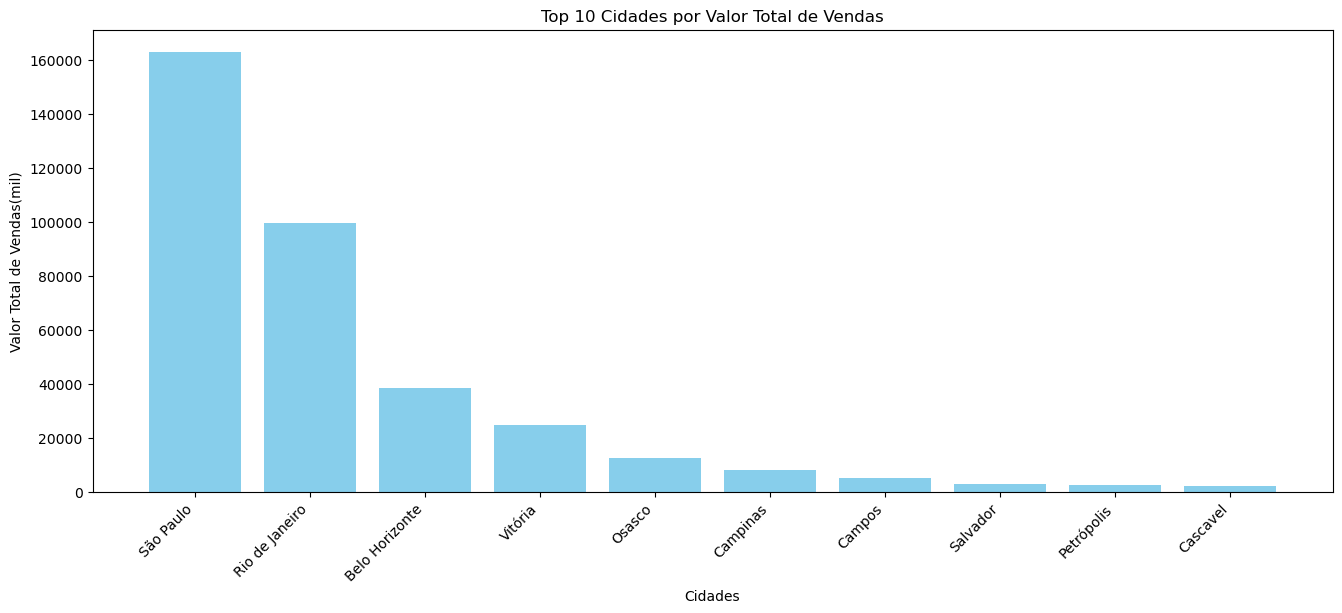

In [156]:
dfcidades=df.groupby("Cidade")["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False).head(10) 

#Tamanho da figura.
plt.figure(figsize=(16, 6))  # Ajusta o tamanho da figura conforme necess√°rio

#Gr√°fico de barras com cor.
plt.bar(dfcidades["Cidade"], dfcidades["ValorVenda"], color='skyblue')
plt.xticks(rotation=45, ha="right")  # Rotaciona os r√≥tulos do eixo X para melhor legibilidade

#Labels e titulo
plt.xlabel("Cidades")
plt.ylabel("Valor Total de Vendas(mil)")
plt.title("Top 10 Cidades por Valor Total de Vendas")
plt.show()

- Produtos mais vendidos

In [157]:
df["Produto"].value_counts()

Produto
Geladeira Duplex            110
Aspirador                    61
Micro-Ondas                  56
Impressora Deskjet           36
Morotola Moto G5             29
Ventilador                   22
Fritadeira                   20
Lavadora 11 Kg               16
Samsung Galaxy 8             16
Processador de Alimentos     13
Ar Condicionado              12
Secadora Vapor               12
Forno-Micro-Ondas            11
Notebook Dell 8 GB           10
Desktop 32 GB                10
Grill                         9
Liquidificador                8
Desktop HP 16 GB              4
Sony Experia XA               1
LG K10 TV Power               1
Name: count, dtype: int64

- Maiores vendas de produtos em 2012.

In [158]:
#2012
df_2012 = df[df["Ano"] == 2012]
df_2012.groupby(["Ano", "Produto"])["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False)

Ano             Produto  ValorVenda
7  2012  Notebook Dell 8 GB    12823.54
2  2012    Geladeira Duplex    12070.89
6  2012         Micro-Ondas     5611.00
5  2012      Lavadora 11 Kg     2606.19
0  2012       Desktop 32 GB     2134.12
1  2012   Forno-Micro-Ondas     1345.00
4  2012     LG K10 TV Power      679.00
3  2012               Grill      234.00

- Notebook Delll de 8GB teve uma uma queda muito grande, n√£o aparecendo nem entre as 14 principais vendas do ano de 2013.

- J√° a Geladeira Duplex aumentou as vendas em aproximadamente 146.59% como podemos ver abaixo.

In [159]:
#Calculando porcentagem.
geladeiraduplex=(29765.56-12070.89) /12070.89*100
print("Aumento percentual de vendas da Geladeira Duplex de 2012 para 2013 foi de: {:.2f}%".format(geladeiraduplex))

Aumento percentual de vendas da Geladeira Duplex de 2012 para 2013 foi de: 146.59%


In [160]:
#2013.
df_2013 = df[df["Ano"] == 2013]
df_2013.groupby(["Ano", "Produto"])["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False)

Ano             Produto  ValorVenda
6   2013    Geladeira Duplex    29765.56
9   2013      Lavadora 11 Kg    10503.57
11  2013    Samsung Galaxy 8     9897.00
12  2013      Secadora Vapor     7976.11
2   2013       Desktop 32 GB     7589.99
8   2013  Impressora Deskjet     7077.44
0   2013     Ar Condicionado     6456.00
3   2013    Desktop HP 16 GB     4842.00
4   2013   Forno-Micro-Ondas     3037.89
1   2013           Aspirador     2655.00
10  2013         Micro-Ondas     2145.00
13  2013     Sony Experia XA      699.00
7   2013               Grill      477.00
5   2013          Fritadeira      297.00

- A venda de Geladeira Duplex teve uma queda em rela√ß√£o a 2013, enquanto as vendas de Samsung Galaxy 8  teve um aumento consider√°vel no mesmo per√≠odo de 102,03%.

In [161]:
#Calculando porcentagem.
celulargalaxy=(19995.00-9897.00) /9897.00*100
print("Aumento percentual de vendas de Samsgung Galaxy 8 foi de: {:.2f}%".format(celulargalaxy))

Aumento percentual de vendas de Samsgung Galaxy 8 foi de: 102.03%


In [162]:
#2014.
df_2014 = df[df["Ano"] == 2014]
df_2014.groupby(["Ano", "Produto"])["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False)

Ano                   Produto  ValorVenda
3  2014          Geladeira Duplex    23503.00
8  2014          Samsung Galaxy 8    19995.00
5  2014               Micro-Ondas     6195.12
6  2014          Morotola Moto G5     6150.00
0  2014                 Aspirador     3013.00
1  2014         Forno-Micro-Ondas     2217.90
4  2014                     Grill     1188.00
2  2014                Fritadeira      911.00
7  2014  Processador de Alimentos      149.00

- Geladeira Duplex continua como um bom destaque 

In [163]:
geladeiraduplex2015=(55042.87-23503.00) /23503.007*100
print("Aumento percentual de vendas da Geladeira Duplex de 2012 para 2013 foi de: {:.2f}%".format(geladeiraduplex2015))

Aumento percentual de vendas da Geladeira Duplex de 2012 para 2013 foi de: 134.20%


In [164]:
#2015.
df_2015 = df[df["Ano"] == 2015]
df_2015.groupby(["Ano", "Produto"])["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False)

Ano                   Produto  ValorVenda
3   2015          Geladeira Duplex    55042.87
9   2015          Samsung Galaxy 8    31992.00
7   2015          Morotola Moto G5    29190.00
6   2015               Micro-Ondas    14797.01
4   2015        Impressora Deskjet    13862.46
0   2015           Ar Condicionado     8150.00
1   2015                 Aspirador     4705.45
10  2015                Ventilador     2934.00
8   2015  Processador de Alimentos     1788.00
2   2015                Fritadeira     1467.00
5   2015            Liquidificador     1136.00

# Conclus√£o

Em suma, a an√°lise dos dados da empresa revelou √°reas cr√≠ticas que necessitam de aten√ß√£o imediata para garantir sua sustentabilidade e promover um crescimento robusto. A gest√£o inadequada das margens de lucro e as quedas nas vendas de produtos eletr√¥nicos e eletroport√°teis destacam a urg√™ncia de reavalia√ß√µes estrat√©gicas.

A implementa√ß√£o de ajustes nos pre√ßos, aliada a uma an√°lise competitiva e √† reformula√ß√£o das estrat√©gias de marketing, √© fundamental para restaurar a sa√∫de financeira dos produtos. Al√©m disso, a investiga√ß√£o das causas por tr√°s da queda nas vendas em 2014 permitir√° √† empresa entender melhor as din√¢micas do mercado e adaptar suas abordagens de forma proativa.

Ao focar na coleta e an√°lise de dados para informar decis√µes estrat√©gicas, a empresa estar√° mais bem equipada para enfrentar os desafios atuais e futuros, assegurando sua competitividade e alinhamento com as tend√™ncias do mercado. Com essas medidas corretivas, a empresa poder√° n√£o apenas recuperar seu desempenho, mas tamb√©m estabelecer uma base s√≥lida para um crescimento sustent√°vel a longo prazo.

&nbsp;

# ![Varejo](https://img.freepik.com/fotos-premium/empresario-mostrando-a-evolucao-dos-negocios-com-um-grafico_1057126-157.jpg?w=1800)